In [2]:
import pandas as pd
df_aq = pd.read_csv('AirQuality.csv')
df_aq.head()


,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [3]:
df_aq.isnull().sum()


Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;    2556
dtype: int64

In [4]:
df_aq.describe()


,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
count,6915
unique,4941
top,7487;;
freq,6


In [8]:
df_aq = pd.read_csv("AirQuality.csv", sep=";", on_bad_lines='skip')
df_aq.columns = df_aq.columns.str.strip()  # remove leading/trailing spaces

# Now check if 'Date' exists
print(df_aq.columns.tolist())

# Convert Date and set as index
df_aq['Date'] = pd.to_datetime(df_aq['Date'], errors='coerce')
df_aq.set_index('Date', inplace=True)

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


In [13]:
print(df_aq.columns.tolist())


['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


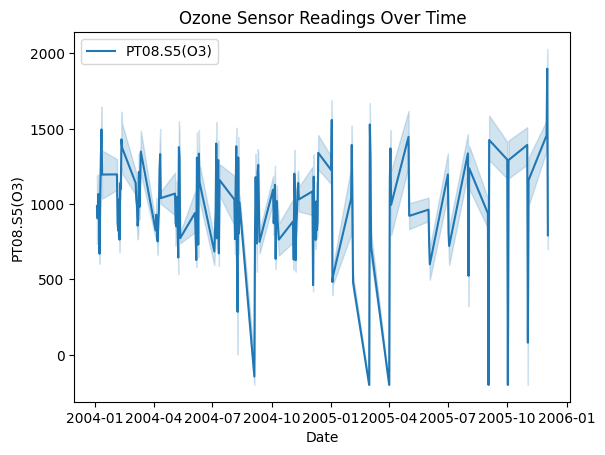

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot ozone concentration (PT08.S5(O3)) over time
sns.lineplot(data=df_aq[['PT08.S5(O3)']])
plt.title('Ozone Sensor Readings Over Time')
plt.ylabel('PT08.S5(O3)')
plt.xlabel('Date')
plt.show()


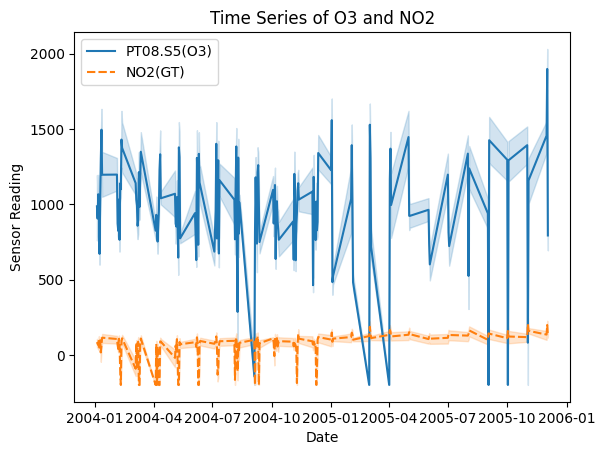

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Time series plot for O3 and NO2
sns.lineplot(data=df_aq[['PT08.S5(O3)', 'NO2(GT)']])
plt.title('Time Series of O3 and NO2')
plt.xlabel('Date')
plt.ylabel('Sensor Reading')
plt.show()


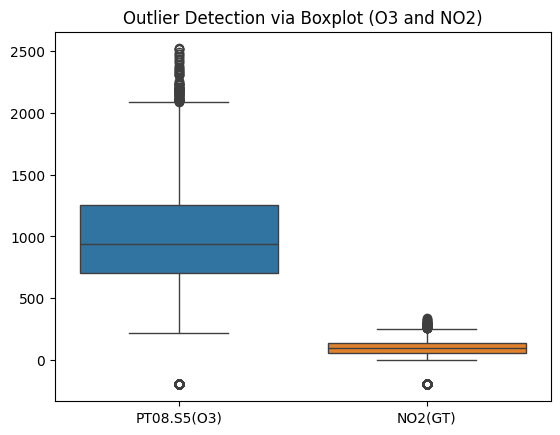

In [16]:
sns.boxplot(data=df_aq[['PT08.S5(O3)', 'NO2(GT)']])
plt.title("Outlier Detection via Boxplot (O3 and NO2)")
plt.show()


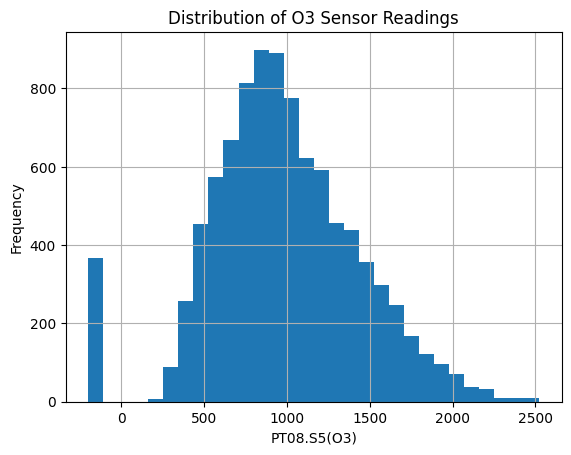

In [17]:
df_aq['PT08.S5(O3)'].hist(bins=30)
plt.title("Distribution of O3 Sensor Readings")
plt.xlabel("PT08.S5(O3)")
plt.ylabel("Frequency")
plt.show()


C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


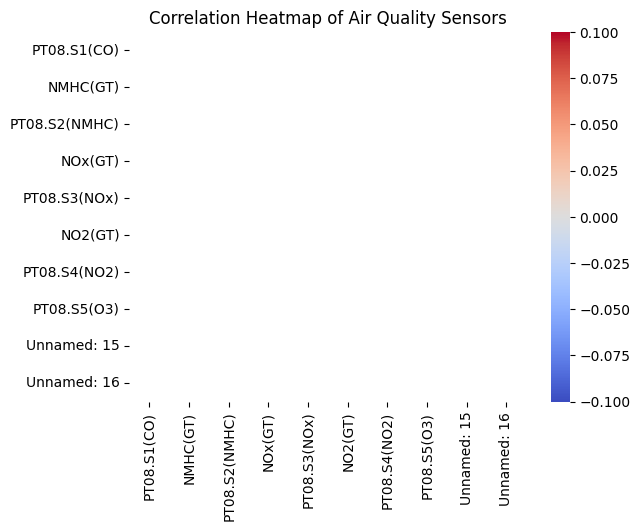

In [18]:
import numpy as np

# Use only numeric columns and drop missing values
numeric_df = df_aq.select_dtypes(include=np.number).dropna()

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Air Quality Sensors")
plt.show()
